# Segmentation

This module will demonstrate how to seperate the image into smaller images of the clusters. The pipeline performs the following operations:
    
    - Load image.
    - Convert image to grayscale.
    - Convert image to binary.
    - Convert image to set.
    - Dilate image by factor x.
    - For all foreground pixels find connected pixels as new set with flood fill algorithm.
    - Get boundary boxes.
    - Extract subimages.
    - Write subimages to disk.

In [1]:
# Import the image processing library.
import modules.oiplib5 as oiplib5

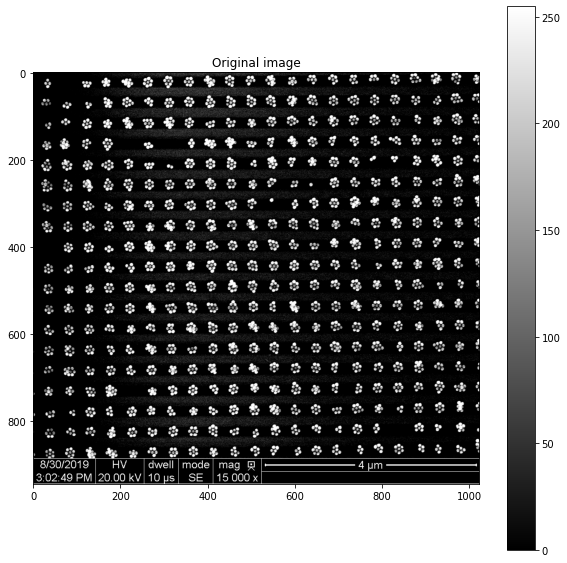

In [2]:
# Load the image.
uint8ImageOriginal = oiplib5.loadImage('../images/heptamers.tiff');
oiplib5.showImage(uint8ImageOriginal, "Original image", figsize=10);